In [39]:

import face_utils 
import matplotlib.pyplot as plt 
import numpy as np 
import argparse 
import imutils 
import dlib 
import cv2 
import face_recognition 
 
known_face_encodings = [] 
known_face_names = []

In [40]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [41]:
def name_labeling(input_image):
    image = input_image.copy()
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)
    
    face_names = []
 
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.5)
        name = "Unknown"
 
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
 
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
 
        face_names.append(name)
        
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if name != "Unknown":
            color = (0, 255, 0)
        else:
            color = (0, 0, 255)
 
        cv2.rectangle(image, (left, top), (right, bottom), color, 1)
        cv2.rectangle(image, (left, bottom - 10), (right, bottom), color, cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image, name, (left + 3, bottom - 3), font, 0.2, (0, 0, 0), 1)
        
    plt_imshow("Output", image, figsize=(24, 15))

In [42]:
def draw_label(input_image, coordinates, label):
    image = input_image.copy()
    (top, right, bottom, left) = coordinates
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 5)
    cv2.putText(image, label, (left - 10, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    
    return image
    
def add_known_face(face_image_path, name):
    face_image = cv2.imread(face_image_path)
    face_location = face_recognition.face_locations(face_image)[0]
    face_encoding = face_recognition.face_encodings(face_image)[0]
    
    detected_face_image = draw_label(face_image, face_location, name)
    
    known_face_encodings.append(face_encoding)
    known_face_names.append(name)
    
    plt_imshow(["Input Image", "Detected Face"], [face_image, detected_face_image])

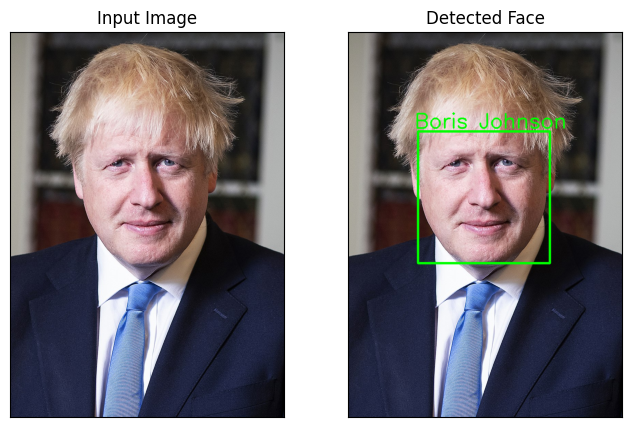

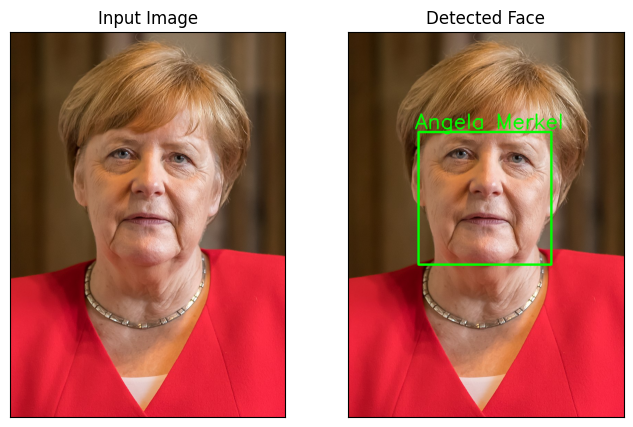

In [43]:
add_known_face("asset/images/Boris_Johnson.jpeg", "Boris Johnson") 
add_known_face("asset/images/Angela_Merkel.jpeg", "Angela Merkel")

In [44]:
known_face_encodings = []
known_face_names = []
 
test_image_path = 'asset/images/2021_g7.jpg'
test_image = cv2.imread(test_image_path)
 
if test_image is None:
    print('The image does not exist in the path.')
else:
    print('image loading complete.')

image loading complete.


In [45]:
name_labeling(test_image)

ValueError: attempt to get argmin of an empty sequence

In [35]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("asset/images/we.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

# Show the picture
pil_image.show()

I found 10 face(s) in this photograph.
The chin in this face has the following points: [(716, 508), (716, 516), (717, 524), (718, 532), (720, 539), (725, 545), (732, 549), (739, 553), (747, 554), (755, 553), (763, 550), (769, 545), (774, 539), (777, 532), (778, 525), (779, 517), (779, 509)]
The left_eyebrow in this face has the following points: [(723, 499), (728, 496), (733, 495), (738, 496), (743, 498)]
The right_eyebrow in this face has the following points: [(752, 499), (757, 497), (763, 496), (769, 497), (773, 501)]
The nose_bridge in this face has the following points: [(748, 504), (748, 509), (748, 514), (748, 519)]
The nose_tip in this face has the following points: [(741, 524), (744, 525), (747, 526), (750, 525), (753, 525)]
The left_eye in this face has the following points: [(728, 504), (732, 502), (736, 503), (739, 506), (736, 506), (732, 506)]
The right_eye in this face has the following points: [(756, 507), (760, 504), (764, 504), (767, 507), (764, 507), (760, 507)]
The t